In [0]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.stats import norm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/data/formatted_flights.csv"

'/content/drive/My Drive/Colab Notebooks/data/formatted_flights.csv'


In [0]:
input_file = "/content/drive/My Drive/Colab Notebooks/data/formatted_flights.csv"
flights = pd.read_csv(input_file)
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [0]:
flights.arr_delay.describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

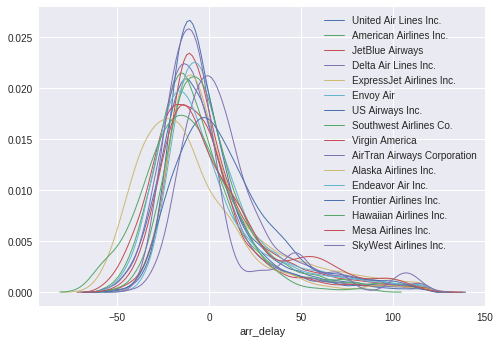

In [0]:
airlines = flights.name.unique()

for airline in airlines:
  subset = flights[flights['name'] == airline]
  # Draw the density plot
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = airline)

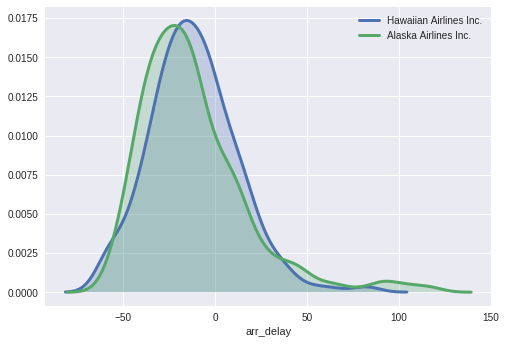

In [0]:
subset = flights[flights['name'] == "Hawaiian Airlines Inc."]
sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Hawaiian Airlines Inc.")

subset = flights[flights['name'] == "Alaska Airlines Inc."]
sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Alaska Airlines Inc.")

From the density plots we understand that Alaska Airlines Inc and Hawaiian Airlines Inc. are the top two airlines I would pick to reach my destination on time as their plots show that they will have the least delay as most of their area is left of 0 delay.


PART 2:

4 ASPECTS OF CENTRAL LIMIT THEOREM

In [0]:
def get_samples(df, num_samples, size):
  samples = []
  for n in range(num_samples):
    samples.append(df.sample(size))
    
  return samples


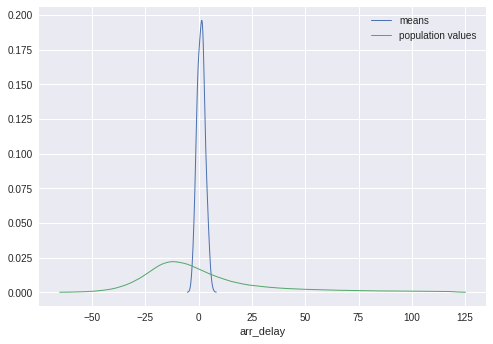

In [0]:
population_values = flights.arr_delay
sample_size = 300
samples = get_samples(flights, 300, sample_size)

means = [np.mean(sample.arr_delay) for sample in samples]
stds = [np.std(sample.arr_delay) for sample in samples]

sns.distplot(means, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = "means")

sns.distplot(population_values, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = "population values")

1. The density plot shows that the sampling distribution of the mean is less spread than the population values from which sample is drawn

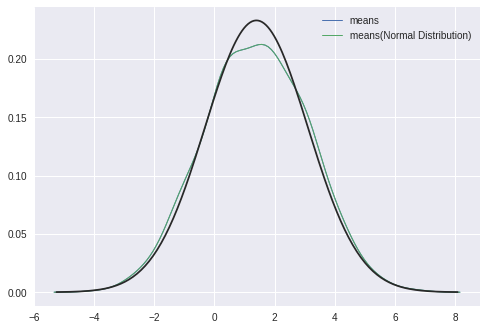

In [0]:
sns.distplot(means, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = "means")

sns.distplot(means, hist = False, fit=norm, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = "means(Normal Distribution)")


2. The sample distribution is well-modeled by a normal distribution


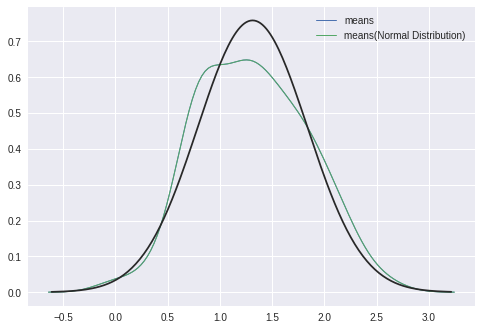

In [0]:
sample_size = 3000
samples = get_samples(flights, 300, sample_size)

means = [np.mean(sample.arr_delay) for sample in samples]

sns.distplot(means, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = "means")

sns.distplot(means, hist = False, fit=norm, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = "means(Normal Distribution)")

2. The sample distribution is well-modeled by a normal distribution. And it gets closer with larger sample size

In [0]:
mean_samples = np.mean(means)
mean_population = np.mean(population_values)
print("Sampling distribution mean = {} is close to equal to population mean = {}".format(mean_samples, mean_population))

std_samples = np.std(means)
std_population = np.std(population_values)

print("Sampling distribution std. deviation = {} is close to equal to population std. deviation/sqrt(sample size) = {}".format(std_samples, std_population/np.sqrt(sample_size)))

Sampling distribution mean = 1.2886033333333333 is close to equal to population mean = 1.2971432896160044
Sampling distribution std. deviation = 0.5340282931088396 is close to equal to population std. deviation/sqrt(sample size) = 0.5306400986850126


3. The spread of sampling distribution is related to the spread of the population values.

In [0]:
print("Smaller Sample Size = {}: Sampling distribution std. deviation = {} is close to equal to population std. deviation/sqrt(sample size) = {}".format(sample_size, std_samples, std_population/np.sqrt(sample_size)))
sample_size = 300000
samples = get_samples(flights, 10, sample_size)

means = [np.mean(sample.arr_delay) for sample in samples]

std_samples = np.std(means)
std_population = np.std(population_values)

print("Bigger Sample Size = {}: Sampling distribution std. deviation = {} is close to equal to population std. deviation/sqrt(sample size) = {}".format(sample_size, std_samples, std_population/np.sqrt(sample_size)))

Smaller Sample Size = 3000: Sampling distribution std. deviation = 0.008330135393057344 is close to equal to population std. deviation/sqrt(sample size) = 0.5306400986850126
Bigger Sample Size = 300000: Sampling distribution std. deviation = 0.011943140755727156 is close to equal to population std. deviation/sqrt(sample size) = 0.05306400986850126


4. With bigger sample size the spread is smaller, evident with standard deviation values.